# Machine Learning for Absolute Beginners

## Simple Linear Regression - 

## 0. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm

## 1. Load and Verify Dataset

In [2]:
# load dataset and create dataframe
df = pd.read_csv('data/edincome.csv').round(1)

In [3]:
# verify first few records
df.head()

,Education,Income
0,10.0,32.1
1,10.4,36.5
2,10.7,23.9
3,11.1,52.3
4,11.4,30.2


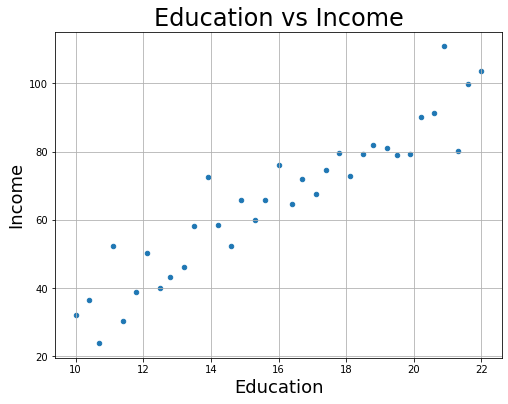

In [4]:
# plot scatterplot

fig = df.plot.scatter(x="Education", y="Income",figsize=(8, 6) )
plt.title('Education vs Income',fontsize=24)
plt.xlabel('Education', fontsize=18)
plt.ylabel('Income',fontsize=18)
plt.grid()

## 2. Run Simple Linear Regression

In [5]:
slr = ols('Income ~ Education',df).fit()

In [6]:
print(slr.params)

Intercept   -23.176365
Education     5.574237
dtype: float64


In [7]:
slr.params[0]

-23.176364855801438

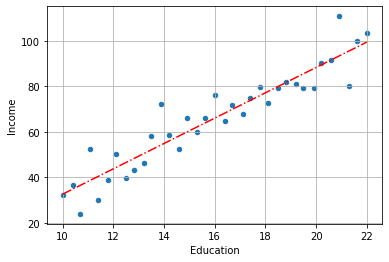

In [8]:
fig = df.plot.scatter(x="Education", y="Income")
x = np.linspace(10,22,100)
y = slr.params[1]*x + slr.params[0]
plt.plot(x, y, '-.r')
plt.grid()

## 3. Review Results and Evaluate Model

In [9]:
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     238.4
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.17e-16
Time:                        16:23:45   Log-Likelihood:                -119.61
No. Observations:                  35   AIC:                             243.2
Df Residuals:                      33   BIC:                             246.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -23.1764      5.918     -3.917      0.000     -35.216     -11.137
Education      5.5742      0.361     15.440      0.000       4.840       6.309
==============================================================================
Omnibus:                        2.854   Durbin-Watson:                   2.535
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                1.726
Skew:                           0.502   Prob(JB):                        0.422
Kurtosis:                       3.420   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(slr.rsquared)

0.8784032808796992


In [11]:
print(slr.mse_model)

13766.191657863852


## 4. Generate Predictions

In [12]:
# predict new points
data = {'Education': [12,16,18]}
df_predict = pd.DataFrame(data).round(1)

In [13]:
df_predict['Income'] = slr.predict(df_predict).round(1)

In [14]:
df_predict

,Education,Income
0,12,43.7
1,16,66.0
2,18,77.2
